## Exercises of day 5

A signal is recorded by a linear uniform array comprising 16 sensors located 5 cm apart with the following specifications: There are two narrowband sources impinging on the array which are sampled at 8 kHz. The first has a frequency of 500 Hz, an amplitude of 5, and a DOA of -pi/4. The second has a frequency of 500 Hz, an amplitude of 3, and a DOA of pi/5. 
- Compute the relative delays of the two sources for the different sensors.
- Write a script for testing DOA estimators based on the signal specified above assuming a complex signal model. Aside from the two signals specified above, also add complex Gaussian noise with a variance of 1 to the signal and generate 64 snapshots and compute the spatial covariance matrix.
- Implement the classic beamformer, i.e., the spatial equivalent of the periodogram, and plot the spatial spectrum.
- Implement Capon beamformer, plot the spatial spectrum and compare the result to the one obtained with the classic beamformer. 


In [1]:
#imports
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# parameters
N = 64 # Number of snapshots/signal length
M = 16 # Number of sensors
d = 0.05 # Distance between sensors
f = [500, 500] # Array containing frequencies
fs = 8000 # Sampling rate
doas = [-np.pi/4, np.pi/5] # Array containing DOAs
A = [5.0, 3.0] # Array containing amplitudes
phase = [0.3, 0.7] 

When we generate noise for the signal, we assume that the noise is unique for each sensor and as such we have a different signal for each sensor

In [ ]:
class ArraySignal:
    def __init__(self, M, d):
        """
        Initialize the ArraySignal object.

        Parameters
        ----------
        M : int
            Number of sensors in the array.
        d : float
            Distance between adjacent sensors (in meters).
        """
        self.M = M
        self.d = d
        np.random.seed(42)

    def _steering_vectors(self, thetas, freqs, c=343.0):
        """
        Compute the steering vectors for the array.

        Parameters
        ----------
        thetas : array-like
            List or array of angles of arrival (in radians).
        freqs : array-like
            List or array of frequencies (in Hz).
        c : float, optional
            Speed of propagation (default is 343.0 m/s for air).

        Returns
        -------
        A : ndarray
            Steering matrix of shape (M, len(thetas)), complex-valued.
        """
        thetas = np.atleast_1d(thetas)
        freqs = np.atleast_1d(freqs)
        m_idx = np.arange(self.M) * self.d

        A = np.zeros((self.M, len(thetas)), dtype=complex)
        for i, (theta, f) in enumerate(zip(thetas, freqs)):
            k = 2 * np.pi * f / c
            phase_shifts = -1j * k * m_idx * np.sin(theta)
            A[:, i] = np.exp(phase_shifts)
        return A


    def generate_signal(self, N, fs, A, freqs, theta, sigma=1.0):

        n = np.arange(N)
        t = n / fs

  
        phases = np.random.uniform(0, 2*np.pi, size=len(A))
        S = np.zeros((len(A), N), dtype=complex)
        
        for i, (amp, f, phi) in enumerate(zip(A, freqs, phases)):
            S[i, :] = amp * np.exp(1j * (2*np.pi*f*t + phi))
 
        A_true = self._steering_vectors(theta, freqs)
        
        X_signal = A_true @ S
        noise = np.sqrt(sigma/2) * (np.random.randn(self.M, N) + 1j*np.random.randn(self.M, N))
        X = X_signal + noise
        return X

In [3]:
# Generate signal
signal_constructor = ArraySignal(M, d)
X = signal_constructor.generate_signal(N, fs, A, f, doas)

plt.plot(np.arange(X.shape[1]), X[0,:].real)
plt.plot(np.arange(X.shape[1]), X[0,:].imag)
plt.show()

NameError: name 'ArraySignal' is not defined

Calculating the relative delays for each sesnor, assuming source at 0.

In [ ]:
delays = get_delays(M, d, doas)
print(delays)

[[-0.00000000e+00  0.00000000e+00]
 [-1.03076790e-04  8.56829814e-05]
 [-2.06153581e-04  1.71365963e-04]
 [-3.09230371e-04  2.57048944e-04]
 [-4.12307161e-04  3.42731926e-04]
 [-5.15383951e-04  4.28414907e-04]
 [-6.18460742e-04  5.14097888e-04]
 [-7.21537532e-04  5.99780870e-04]
 [-8.24614322e-04  6.85463851e-04]
 [-9.27691112e-04  7.71146832e-04]
 [-1.03076790e-03  8.56829814e-04]
 [-1.13384469e-03  9.42512795e-04]
 [-1.23692148e-03  1.02819578e-03]
 [-1.33999827e-03  1.11387876e-03]
 [-1.44307506e-03  1.19956174e-03]
 [-1.54615185e-03  1.28524472e-03]]


In [ ]:
from arrays import CaponBeamformer, ClassicBeamformer

beamformer_model = ClassicBeamformer(X, M)
P_classic = beamformer_model.compute_spectrum(d, f)
print(P_classic)

beamformer_model = CaponBeamformer(X, M)
P_capon = beamformer_model.compute_spectrum(d, f)

[15.67814662 15.67849665 15.67954671 15.68129666 15.68374628 15.68689526
 15.6907432  15.69528961 15.70053392 15.70647546 15.71311346 15.72044709
 15.72847539 15.73719734 15.74661181 15.75671758 15.76751335 15.77899769
 15.79116912 15.80402602 15.8175667  15.83178936 15.84669211 15.86227293
 15.87852974 15.89546033 15.91306238 15.93133348 15.95027111 15.96987262
 15.99013529 16.01105624 16.0326325  16.05486099 16.07773851 16.10126173
 16.12542721 16.15023137 16.17567054 16.20174088 16.22843845 16.25575918
 16.28369885 16.31225312 16.34141752 16.37118742 16.40155806 16.43252453
 16.4640818  16.49622467 16.52894779 16.56224567 16.59611266 16.63054294
 16.66553057 16.70106941 16.73715317 16.7737754  16.81092948 16.84860862
 16.88680585 16.92551404 16.96472587 17.00443385 17.0446303  17.08530737
 17.126457   17.16807097 17.21014085 17.25265802 17.29561368 17.33899881
 17.3828042  17.42702046 17.47163796 17.51664689 17.56203722 17.60779873
 17.65392096 17.70039326 17.74720477 17.79434438 17

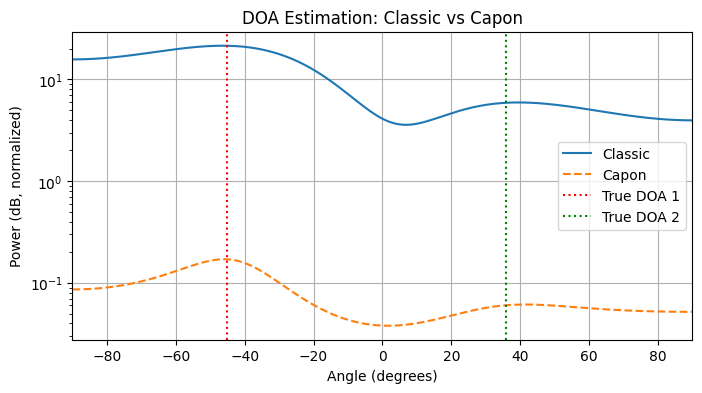

In [ ]:
angles_deg = np.linspace(-90, 90, 721)

plt.figure(figsize=(8,4))
plt.plot(angles_deg, P_classic, label="Classic")
plt.plot(angles_deg, P_capon, label="Capon", linestyle="--")
plt.title("DOA Estimation: Classic vs Capon")
plt.xlabel("Angle (degrees)")
plt.ylabel("Power (dB, normalized)")
plt.legend()
plt.grid(True)
plt.xlim(-90, 90)
plt.yscale('log')

# Add true DOA vertical lines
plt.axvline(np.degrees(doas[0]), color='r', linestyle=':', label='True DOA 1')
plt.axvline(np.degrees(doas[1]), color='g', linestyle=':', label='True DOA 2')
plt.legend()
plt.show()